# S&P 500 Stats

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.float_format', lambda x: "{0:,.2f}".format(x))
pd.set_option('display.max_columns', 25)

In [38]:
data = pd.read_excel("S&P500_Fundementals.xlsx")
df = data.drop(['close', 'volume', 'eps_ttm', "pe_ttm", "shares_outstanding"], axis=1)
df = df.rename(columns={"number_of_employees":"employees"})
df.head(3)

,name,description,type,rating,market_cap,employees,total_revenue,gross_profit,ebitda,net_income,total_assets,total_debt,total_current_assets,dividends_paid,sector
0,A,"Agilent Technologies, Inc.",stock,0.42,"46,332,310,105.67",18100,"6,848,000,000.00","3,686,000,000.00","1,899,000,000.00","1,254,000,000.00","10,532,000,000.00","2,921,000,000.00","3,778,000,000.00","-250,000,000.00",Health Technology
1,AAL,"American Airlines Group, Inc.",stock,0.60,"10,937,831,901.24",123400,"29,882,000,000.00","27,000,000.00","1,758,000,000.00","-1,993,000,000.00","66,652,000,000.00","44,682,000,000.00","17,377,000,000.00",0.00,Transportation
2,AAP,Advance Auto Parts Inc.,stock,-0.09,"9,017,822,892.60",68000,"10,997,989,000.00","4,903,769,000.00","1,012,871,000.00","616,108,000.00","12,132,079,000.00","4,086,856,000.00","6,162,519,000.00","-160,925,000.00",Retail Trade


### Finding the company with most valuable employees 

In [110]:
# em = df[["name", "description", "sector", "rating", "number_of_employees"]].copy()
df["mrk_emp"] = df.total_assets / df.employees
df.sort_values(by="mrk_emp", ascending=False)[["description", "type","sector", "market_cap", "employees", "total_revenue", "net_income", "mrk_emp"]].head(5)

,description,type,sector,market_cap,employees,total_revenue,net_income,mrk_emp
373,Pinnacle West Capital Corporation,stock,Utilities,"8,621,283,546.95",91,"3,803,835,000.00","618,720,000.00","251,039,538.46"
464,VICI Properties Inc.,fund,Finance,"32,302,304,461.00",152,"1,509,568,000.00","1,013,851,000.00","245,447,250.00"
343,Realty Income Corporation,fund,Finance,"41,392,155,396.00",371,"2,084,820,000.00","359,456,000.00","123,699,393.53"
479,Welltower Inc.,fund,Finance,"33,941,214,704.00",464,"4,734,010,000.00","336,138,000.00","80,634,672.41"
358,"Healthpeak Properties, Inc.",fund,Finance,"14,691,985,869.00",196,"1,896,184,000.00","504,810,000.00","79,907,938.78"


In [112]:
df.groupby("sector").agg({"name":"count", "market_cap":"sum","employees":"sum", "mrk_emp":"mean"}).sort_values("mrk_emp", ascending=False)

,name,market_cap,employees,mrk_emp
sector,,,,
Finance,94,"4,965,778,591,220.68",3037121,"17,760,309.14"
Utilities,31,"1,065,263,611,217.25",372119,"12,997,098.95"
Energy Minerals,18,"1,566,286,536,960.97",227629,"12,007,834.99"
Communications,4,"506,689,471,236.85",432400,"2,409,535.15"
Industrial Services,8,"327,103,399,882.00",346576,"2,287,567.39"
Health Technology,46,"4,008,272,382,450.34",1550024,"1,437,680.27"
Consumer Durables,12,"646,400,303,873.49",681802,"1,297,649.65"
Process Industries,23,"767,794,153,773.10",664281,"1,286,803.83"
Commercial Services,14,"1,286,464,565,336.98",578510,"1,283,388.60"


In [113]:
df["rev_emp"] = df.total_revenue / df.employees
df["pro_emp"] = df.net_income / df.employees
df["assets_emp"] = df.total_assets / df.employees

In [120]:
df[["description", "mrk_emp", "rev_emp", "pro_emp", "assets_emp"]].sort_values(by="rev_emp", ascending=False)

,description,mrk_emp,rev_emp,pro_emp,assets_emp
373,Pinnacle West Capital Corporation,"251,039,538.46","41,800,384.62","6,799,120.88","251,039,538.46"
226,Host Hotels,"76,043,750.00","18,062,500.00","-68,750.00","76,043,750.00"
465,Valero Energy Corporation,"6,045,959.44","11,616,732.91","94,160.81","6,045,959.44"
479,Welltower Inc.,"80,634,672.41","10,202,607.76","724,435.34","80,634,672.41"
464,VICI Properties Inc.,"245,447,250.00","9,931,368.42","6,670,072.37","245,447,250.00"
...,...,...,...,...,...
142,"Darden Restaurants, Inc.","56,021.03","53,812.11","5,324.21","56,021.03"
219,Hilton Worldwide Holdings Inc.,"109,211.27","40,985.92","2,887.32","109,211.27"
391,Robert Half International Inc.,"15,190.94","33,723.61","3,124.35","15,190.94"
323,Norwegian Cruise Line Holdings Ltd.,"546,136.28","18,673.95","-129,872.82","546,136.28"


In [125]:
df.columns

Index(['name', 'description', 'type', 'rating', 'market_cap', 'employees',
       'total_revenue', 'gross_profit', 'ebitda', 'net_income', 'total_assets',
       'total_debt', 'total_current_assets', 'dividends_paid', 'sector',
       'mrk_emp', 'rev_emp', 'pro_emp', 'assets_emp'],
      dtype='object')

In [127]:
df.groupby("sector").agg({"market_cap":"sum", "total_revenue":"sum", "total_assets": "sum", "total_assets":"sum", "dividends_paid":"sum"})

,market_cap,total_revenue,total_assets,dividends_paid
sector,,,,
Commercial Services,"1,286,464,565,336.98","156,460,023,000.00","480,244,204,000.00","-8,751,338,000.00"
Communications,"506,689,471,236.85","402,282,000,000.00","1,069,869,000,000.00","-26,600,000,000.00"
Consumer Durables,"646,400,303,873.49","468,698,485,000.00","741,285,173,000.00","-2,535,334,000.00"
Consumer Non-Durables,"2,165,258,033,025.56","630,455,717,000.00","989,719,773,000.00","-56,001,430,000.00"
Consumer Services,"1,299,649,553,445.37","514,604,869,000.00","1,312,336,360,000.00","-13,794,416,000.00"
Distribution Services,"287,934,149,972.23","757,618,521,000.00","242,136,751,000.00","-3,018,617,000.00"
Electronic Technology,"5,303,809,459,766.41","1,370,392,699,000.11","2,036,379,629,000.06","-66,371,178,000.01"
Energy Minerals,"1,566,286,536,960.97","970,407,705,000.00","1,314,074,137,000.00","-42,360,000,000.00"
Finance,"4,965,778,591,220.68","1,871,017,747,000.00","25,657,671,298,000.00","-111,865,927,000.00"


In [152]:
df.sort_values(by="market_cap", ascending=False).head()

,name,description,type,rating,market_cap,employees,total_revenue,gross_profit,ebitda,net_income,total_assets,total_debt,total_current_assets,dividends_paid,sector,mrk_emp,rev_emp,pro_emp,assets_emp
3,AAPL,Apple Inc.,stock,-0.04,"2,122,302,131,601.50",164000,"394,328,000,000.00","170,782,000,000.00","130,541,000,000.00","99,803,000,000.00","352,755,000,000.00","132,480,000,000.00","135,405,000,000.00","-14,841,000,000.00",Electronic Technology,"2,150,945.12","2,404,439.02","608,554.88","2,150,945.12"
317,MSFT,Microsoft Corporation,stock,0.00,"1,777,966,421,921.15",221000,"198,270,000,000.00","135,620,000,000.00","98,701,000,000.00","72,738,000,000.00","359,784,000,000.00","77,136,000,000.00","160,812,000,000.00","-18,135,000,000.00",Technology Services,"1,627,981.90","897,149.32","329,131.22","1,627,981.90"
205,GOOG,Alphabet Inc.,stock,0.00,"1,184,536,189,565.76",156500,"257,488,000,000.00","146,549,000,000.00","92,238,000,000.00","76,033,000,000.00","358,255,000,000.00","29,336,000,000.00","166,109,000,000.00",0.00,Technology Services,"2,289,169.33","1,645,290.73","485,833.87","2,289,169.33"
34,AMZN,"Amazon.com, Inc.",stock,0.29,"971,911,567,432.72",1608000,"469,822,000,000.00","197,478,000,000.00","52,077,000,000.00","33,364,000,000.00","428,362,000,000.00","144,580,000,000.00","131,463,000,000.00",0.00,Retail Trade,"266,394.28","292,177.86","20,748.76","266,394.28"
69,BRK.B,Berkshire Hathaway Inc. New,stock,0.40,"702,800,362,034.03",372000,"276,094,000,000.00","55,164,000,000.00","53,305,000,000.00","89,795,000,000.00","902,296,000,000.00","122,661,000,000.00","201,522,000,000.00",0.00,Finance,"2,425,526.88","742,188.17","241,384.41","2,425,526.88"


In [191]:
select_cap = df.sort_values(by="market_cap", ascending=False).iloc[:50].market_cap.sum()
total_cap = df.sort_values(by="market_cap", ascending=False).market_cap.sum()
print("{0:22,.2f}".format(select_cap))
print("{0:22,.2f}".format(total_cap))
print("{0:22,.2f}%".format(round(select_cap/total_cap, 4)*100))

 18,474,658,055,822.52
 35,441,319,205,942.95
                 52.13%


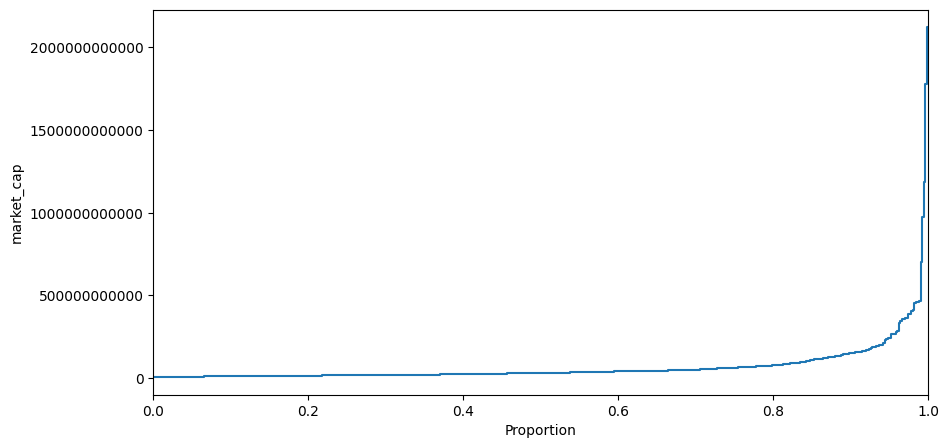

In [208]:
f, axes = plt.subplots(figsize=(10,5))
sns.ecdfplot(data=df, y="market_cap")
plt.ticklabel_format(style='plain', axis='y')

In [217]:
pd.qcut(df.market_cap, q=100)

0         (45560765496.478, 46631541461.546]
1         (10531575129.614, 10949196407.727]
2           (8899682641.935, 9364188609.276]
3      (468638468357.699, 2122302131601.505]
4       (242224279014.784, 276807162700.208]
                       ...                  
495        (36026890769.11, 37049832831.313]
496        (25512189176.973, 26345107194.62]
497       (14942855489.276, 15128834292.032]
498         (7512132142.059, 7902001015.276]
499         (72618206325.1, 76586789171.619]
Name: market_cap, Length: 500, dtype: category
Categories (100, interval[float64, right]): [(5335363977.398, 6628858853.763] < (6628858853.763, 7512132142.059] < (7512132142.059, 7902001015.276] < (7902001015.276, 8391627837.569] ... (276807162700.208, 355256217773.291] < (355256217773.291, 406230230148.288] < (406230230148.288, 468638468357.699] < (468638468357.699, 2122302131601.505]]

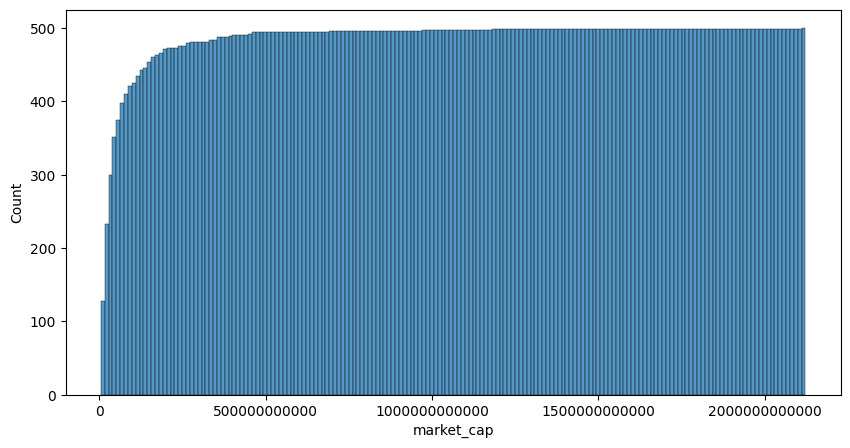

In [215]:
f, axes = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x="market_cap", cumulative=True)
plt.ticklabel_format(style='plain', axis='x')

In [194]:
sns.ecdfplot?

Signature:
sns.ecdfplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='proportion',
    complementary=False,
    palette=None,
    hue_order=None,
    hue_norm=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot empirical cumulative distribution functions.

An ECDF represents the proportion or count of observations falling below each
unique value in a dataset. Compared to a histogram or density plot, it has the
advantage that each observation is visualized directly, meaning that there are
no binning or smoothing parameters that need to be adjusted. It also aids direct
comparisons between multiple distributions. A downside is that the relationship
between the appearance of the plot and the basic properties of the distribution
(such as its central tendency, variance, and the presence of any bimodality)
may not be as intuitive.

More information is provided in the :ref:`user guide <tutorial_ecdf>`.

Parameters
-

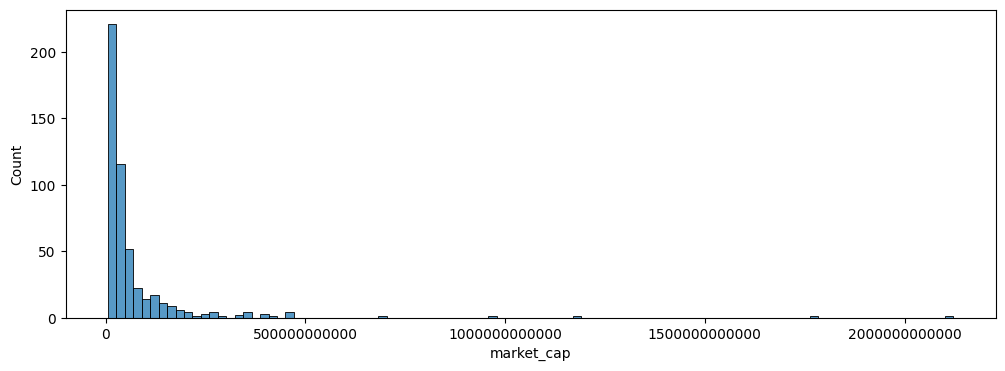

In [142]:
# 'count', 'density', 'percent', 'probability' or 'frequency'  :: 'bars', 'step', 'poly'
f, axes = plt.subplots(figsize=(12,4))
sns.histplot(data=df, x="market_cap", stat="count", element="bars", bins=100)
plt.ticklabel_format(style='plain', axis='x')